In [50]:
import os
import kagglehub
import pandas as pd

In [51]:
# Download latest version of this project's dataset
path = kagglehub.dataset_download("teejmahal20/airline-passenger-satisfaction/version/1")
train = pd.read_csv(os.path.join(path, "train.csv"))
test = pd.read_csv(os.path.join(path, "test.csv"))

print("Path to dataset files:", path)

Path to dataset files: /Users/guneysogut/.cache/kagglehub/datasets/teejmahal20/airline-passenger-satisfaction/versions/1


In [52]:
display(train)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [53]:
display(test)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [54]:
# Extract the related columns for IPA analysis
columns_of_interest = train.iloc[:, 8:-3]
# Get insterested column names
attributes = columns_of_interest.columns.tolist()
# Calculate the mean for each of the columns
means = columns_of_interest.mean().round(2)

In [55]:
print(means.tolist())

[2.73, 3.06, 2.76, 2.98, 3.2, 3.25, 3.44, 3.36, 3.38, 3.35, 3.63, 3.3, 3.64, 3.29]


In [56]:
import json

# Open and read the JSON file
with open('../config/ipa.json', 'r') as file:
    data = json.load(file)
importance_list_company_1 = data["company_1"]
importance_list_company_2 = data["company_2"]

In [57]:
def set_data_frame_object(importance_list):
    # Set the data_set for IPA analysis
    data_set = {
        "Attribute":attributes,
        "Importance": importance_list,
        "Performance": means.tolist(),
    }
    # Create data frame object
    df = pd.DataFrame(data_set)
    return df

# Assign company_1 information
df_company = set_data_frame_object(importance_list_company_1)                                

In [58]:
import matplotlib.pyplot as plt

def plot_ipa(df,importance_mean, performance_mean):
    # Scatter plot of Importance vs. Performance
    plt.figure(figsize=(8, 8))
    plt.scatter(df['Performance'], df['Importance'], c='blue', s=100)
    
    # Add text labels for each attribute
    for i, row in df.iterrows():
        plt.text(row['Performance'] + 0.1, row['Importance'] + 0.1, row['Attribute'], fontsize=10)
    
    # Add gridlines based on mean values
    plt.axhline(y=importance_mean, color='red', linestyle='--', label="Mean Importance")
    plt.axvline(x=performance_mean, color='red', linestyle='--', label="Mean Performance")
    
    # Add labels and title
    plt.xlabel("Performance")
    plt.ylabel("Importance")
    plt.title("Importance-Performance Analysis (IPA)")
    plt.legend()
    plt.grid()
    
    plt.show()



COMPANY 1 IPA ANALYSIS

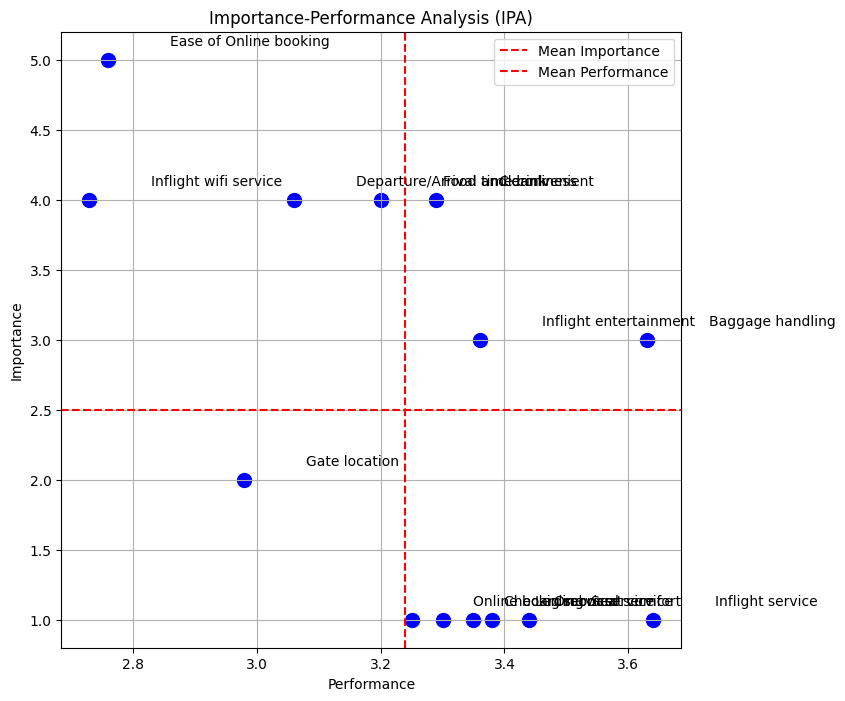

In [59]:
# Calculate mean importance and performance
importance_mean = df_company['Importance'].mean().round(2)
performance_mean = df_company['Performance'].mean().round(2)
    
# Plot company 1 IPA
plot_ipa(df_company,importance_mean, performance_mean)

In [60]:
# Classify attributes based on quadrants
def classify(row):
    if row['Importance'] > importance_mean and row['Performance'] < performance_mean:
        return "Concentrate Here"
    elif row['Importance'] > importance_mean and row['Performance'] > performance_mean:
        return "Good Work"
    elif row['Importance'] < importance_mean and row['Performance'] < performance_mean:
        return "Low Priority"
    else:
        return "Possible Overkill"

df_company['Quadrant'] = df_company.apply(classify, axis=1)

print(df_company)

                            Attribute  Importance  Performance  \
0               Inflight wifi service           4         2.73   
1   Departure/Arrival time convenient           4         3.06   
2              Ease of Online booking           5         2.76   
3                       Gate location           2         2.98   
4                      Food and drink           4         3.20   
5                     Online boarding           1         3.25   
6                        Seat comfort           1         3.44   
7              Inflight entertainment           3         3.36   
8                    On-board service           1         3.38   
9                    Leg room service           1         3.35   
10                   Baggage handling           3         3.63   
11                    Checkin service           1         3.30   
12                   Inflight service           1         3.64   
13                        Cleanliness           4         3.29   

         

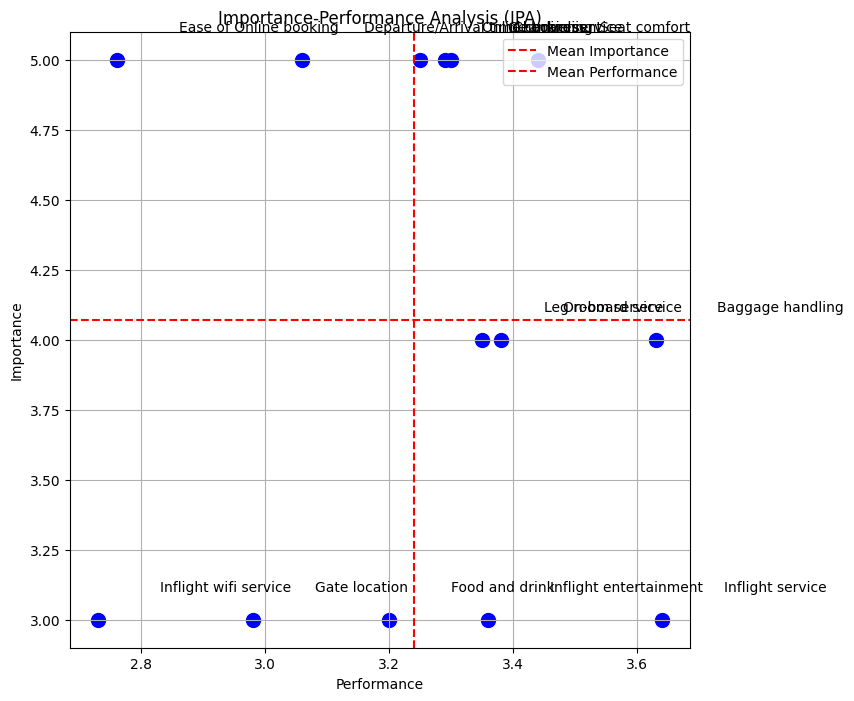

In [61]:
# Assign company_2 information
df_company = set_data_frame_object(importance_list_company_2)

# Calculate mean importance and performance
importance_mean = df_company['Importance'].mean().round(2)
performance_mean = df_company['Performance'].mean().round(2)

# Plot company 2 IPA
plot_ipa(df_company,importance_mean, performance_mean)

In [62]:
# Classify attributes based on quadrants
def classify(row):
    if row['Importance'] > importance_mean and row['Performance'] < performance_mean:
        return "Concentrate Here"
    elif row['Importance'] > importance_mean and row['Performance'] > performance_mean:
        return "Good Work"
    elif row['Importance'] < importance_mean and row['Performance'] < performance_mean:
        return "Low Priority"
    else:
        return "Possible Overkill"

df_company['Quadrant'] = df_company.apply(classify, axis=1)

print(df_company)


                            Attribute  Importance  Performance  \
0               Inflight wifi service           3         2.73   
1   Departure/Arrival time convenient           5         3.06   
2              Ease of Online booking           5         2.76   
3                       Gate location           3         2.98   
4                      Food and drink           3         3.20   
5                     Online boarding           5         3.25   
6                        Seat comfort           5         3.44   
7              Inflight entertainment           3         3.36   
8                    On-board service           4         3.38   
9                    Leg room service           4         3.35   
10                   Baggage handling           4         3.63   
11                    Checkin service           5         3.30   
12                   Inflight service           3         3.64   
13                        Cleanliness           5         3.29   

         